### Approach
- Clean and transform data
    - Dataset overview
    - Data type conversion
    - Handling missing values
- Exploratory data analysis
- Compare pricing strategy performance
- Analyze price elasticity
- Pick the best pricing model
- Explore relationship between conversion and claims
- Model comparison  

### Setup

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# quality-of-life
pd.options.mode.use_inf_as_na = True
pd.set_option("display.max_columns", 150)
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("PA-Dataset.csv")

### Clean and transform data

- Dataset Overview

In [4]:
df.shape

(8867, 21)

In [5]:
df.columns

Index(['offerdate', 'sold_premium', 'offered_premium', 'purchase_price',
       'purchase_date', 'item age', 'pricing_point', 'predictedconversionrate',
       'plan_flag', 'plan_count', 'plansactive_lastyear_count',
       'planscancelled_lastyear_count', 'claims_count', 'claim_amount',
       'price_diff', 'IsModel', 'sale_flag', 'base_rate',
       'manufacturerbrandname_enc', 'itemcategoryname_enc',
       'itemsupercategorycode_enc'],
      dtype='object')

In [6]:
df = df.rename(columns={
'item age': 'item_age',
'offerdate': 'offer_date',
'predictedconversionrate': 'predicted_conversion_rate',
'IsModel': 'is_model',
'manufacturerbrandname_enc': 'manufacturer_brandname_enc',
'itemcategoryname_enc': 'item_category_name_enc',
'itemsupercategorycode_enc':'item_supercategory_code_enc'
}) 

In [7]:
df.head()

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
0,17/03/2023,NaN,32.64,89.99,16/03/2023,1,@22%,0.15,0,0.0,0.0,0.0,0.0,0.00,-0.058824,Yes,0,34.68,56,35,14
1,01/03/2023,69.72,69.72,329.00,24/12/2022,67,@22%,0.81,1,5.0,8.0,2.0,4.0,347.12,-0.023529,Yes,1,71.40,123,34,3
2,12/04/2023,NaN,48.24,249.00,05/04/2023,7,@23%,0.08,0,0.0,0.0,0.0,0.0,0.00,0.210843,Yes,0,39.84,7,16,12
3,09/03/2023,NaN,91.92,746.42,09/03/2021,730,@23%,0.32,0,0.0,0.0,0.0,0.0,0.00,0.298305,Yes,0,70.80,107,36,4
4,18/03/2023,NaN,89.64,493.98,18/03/2023,0,@22%,0.25,1,1.0,1.0,0.0,0.0,0.00,0.299130,Yes,0,69.00,57,36,4


In [8]:
df.tail()

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
8862,10/04/2023,NaN,69.72,275.00,08/04/2023,2,@23%,0.11,0,0.0,0.0,0.0,0.0,0.0,0.094162,Yes,0,63.72,7,37,4
8863,30/03/2023,69.72,69.72,262.14,23/03/2023,7,@22%,0.14,0,0.0,0.0,0.0,NaN,NaN,0.218029,Yes,1,57.24,74,34,3
8864,21/03/2023,NaN,48.12,280.00,21/03/2023,0,@22%,0.12,0,0.0,0.0,0.0,0.0,0.0,-0.012315,Yes,0,48.72,62,12,4
8865,10/03/2023,NaN,69.72,550.00,09/03/2023,1,@22%,0.31,1,1.0,2.0,1.0,NaN,NaN,0.249462,Yes,0,55.80,74,37,4
8866,30/03/2023,53.40,53.40,300.00,16/01/2023,73,@22%,0.11,0,0.0,0.0,0.0,0.0,0.0,0.297376,Yes,1,41.16,12,16,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   offer_date                     8867 non-null   object 
 1   sold_premium                   1991 non-null   float64
 2   offered_premium                8867 non-null   float64
 3   purchase_price                 8866 non-null   float64
 4   purchase_date                  8867 non-null   object 
 5   item_age                       8867 non-null   object 
 6   pricing_point                  8867 non-null   object 
 7   predicted_conversion_rate      8867 non-null   float64
 8   plan_flag                      8867 non-null   int64  
 9   plan_count                     8826 non-null   float64
 10  plansactive_lastyear_count     8826 non-null   float64
 11  planscancelled_lastyear_count  8826 non-null   float64
 12  claims_count                   7718 non-null   f

In [10]:
df.describe()

,sold_premium,offered_premium,purchase_price,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
count,1991.000000,8867.000000,8866.000000,8867.000000,8867.000000,8826.000000,8826.000000,8826.000000,7718.000000,7718.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,53.085445,53.029268,406.714300,0.315993,0.197135,0.409245,0.683889,0.232948,0.210935,29.233799,0.080764,0.224540,49.090976,53.764746,22.601218,4.677117
std,15.115377,16.273887,214.171991,0.298250,0.397858,1.033808,1.966232,0.982052,0.896236,187.440800,0.129798,0.417303,13.565841,38.936852,10.902879,3.894367
min,18.600000,12.720000,19.990000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.298643,0.000000,18.000000,-1.000000,0.000000,0.000000
25%,45.120000,45.000000,295.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.480000,16.000000,12.000000,2.000000
50%,48.240000,48.120000,330.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069149,0.000000,45.960000,57.000000,19.000000,4.000000
75%,63.360000,63.600000,472.085000,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169096,0.000000,59.640000,74.000000,36.000000,4.000000
max,150.000000,150.000000,1200.000000,1.000000,1.000000,5.000000,32.000000,25.000000,30.000000,10523.030000,0.299886,1.000000,150.000000,130.000000,37.000000,16.000000


- Data type conversion

In [11]:
# Convert date columns to datetime format
df['purchase_date'] = pd.to_datetime(df['purchase_date'], dayfirst=True)
df['offer_date']     = pd.to_datetime(df['offer_date'], dayfirst=True)

In [12]:
# Update boolean columns format
df['sale_flag'] = df['sale_flag'].astype(bool)
df['plan_flag'] = df['plan_flag'].astype(bool)
df['is_model']   = df['is_model'].map({'Yes': True, 'No': False}).astype(bool)

In [13]:
#update categorical columns format
df['manufacturer_brandname_enc'] = df['manufacturer_brandname_enc'].astype('category')
df['item_supercategory_code_enc'] = df['item_supercategory_code_enc'].astype('category')
df['item_category_name_enc']      = df['item_category_name_enc'].astype('category')
df['pricing_point']             = df['pricing_point'].astype('category')

In [14]:
#update integer columns format
df['planscancelled_lastyear_count'] = df['planscancelled_lastyear_count'].astype('Int64')
df['plansactive_lastyear_count']    = df['plansactive_lastyear_count'].astype('Int64')
df['claims_count']                  = df['claims_count'].astype('Int64')
df['plan_count']                    = df['plan_count'].astype('Int64')

In [15]:
# Updateing 'item_age' calculation (likely swapped dates)
swap_condition = df['purchase_date'] > df['offer_date']

# Swap 'offer_date' and 'purchase_date' where purchase_date is greater than offer_date
for idx in df[swap_condition].index:
    temp = df.at[idx, 'offer_date']
    df.at[idx, 'offer_date'] = df.at[idx, 'purchase_date']
    df.at[idx, 'purchase_date'] = temp

# Recalculate item age
df['item_age'] = (df['offer_date'] - df['purchase_date']).dt.days
df['item_age'] = df['item_age'].astype('Int64')

- handling missing values

In [54]:
df.isna().sum()

offer_date                          0
sold_premium                     6876
offered_premium                     0
purchase_price                      0
purchase_date                       0
item_age                            0
pricing_point                       0
predicted_conversion_rate           0
plan_flag                           0
plan_count                          0
plansactive_lastyear_count          0
planscancelled_lastyear_count       0
claims_count                        0
claim_amount                        0
price_diff                          0
is_model                            0
sale_flag                           0
base_rate                           0
manufacturer_brandname_enc          0
item_category_name_enc              0
item_supercategory_code_enc         0
missing_claims_flag                 0
dtype: int64

In [17]:
df.head()

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
0,2023-03-17,NaN,32.64,89.99,2023-03-16,1,@22%,0.15,False,0,0,0,0,0.00,-0.058824,True,False,34.68,56,35,14
1,2023-03-01,69.72,69.72,329.00,2022-12-24,67,@22%,0.81,True,5,8,2,4,347.12,-0.023529,True,True,71.40,123,34,3
2,2023-04-12,NaN,48.24,249.00,2023-04-05,7,@23%,0.08,False,0,0,0,0,0.00,0.210843,True,False,39.84,7,16,12
3,2023-03-09,NaN,91.92,746.42,2021-03-09,730,@23%,0.32,False,0,0,0,0,0.00,0.298305,True,False,70.80,107,36,4
4,2023-03-18,NaN,89.64,493.98,2023-03-18,0,@22%,0.25,True,1,1,0,0,0.00,0.299130,True,False,69.00,57,36,4


<Figure size 1200x600 with 0 Axes>

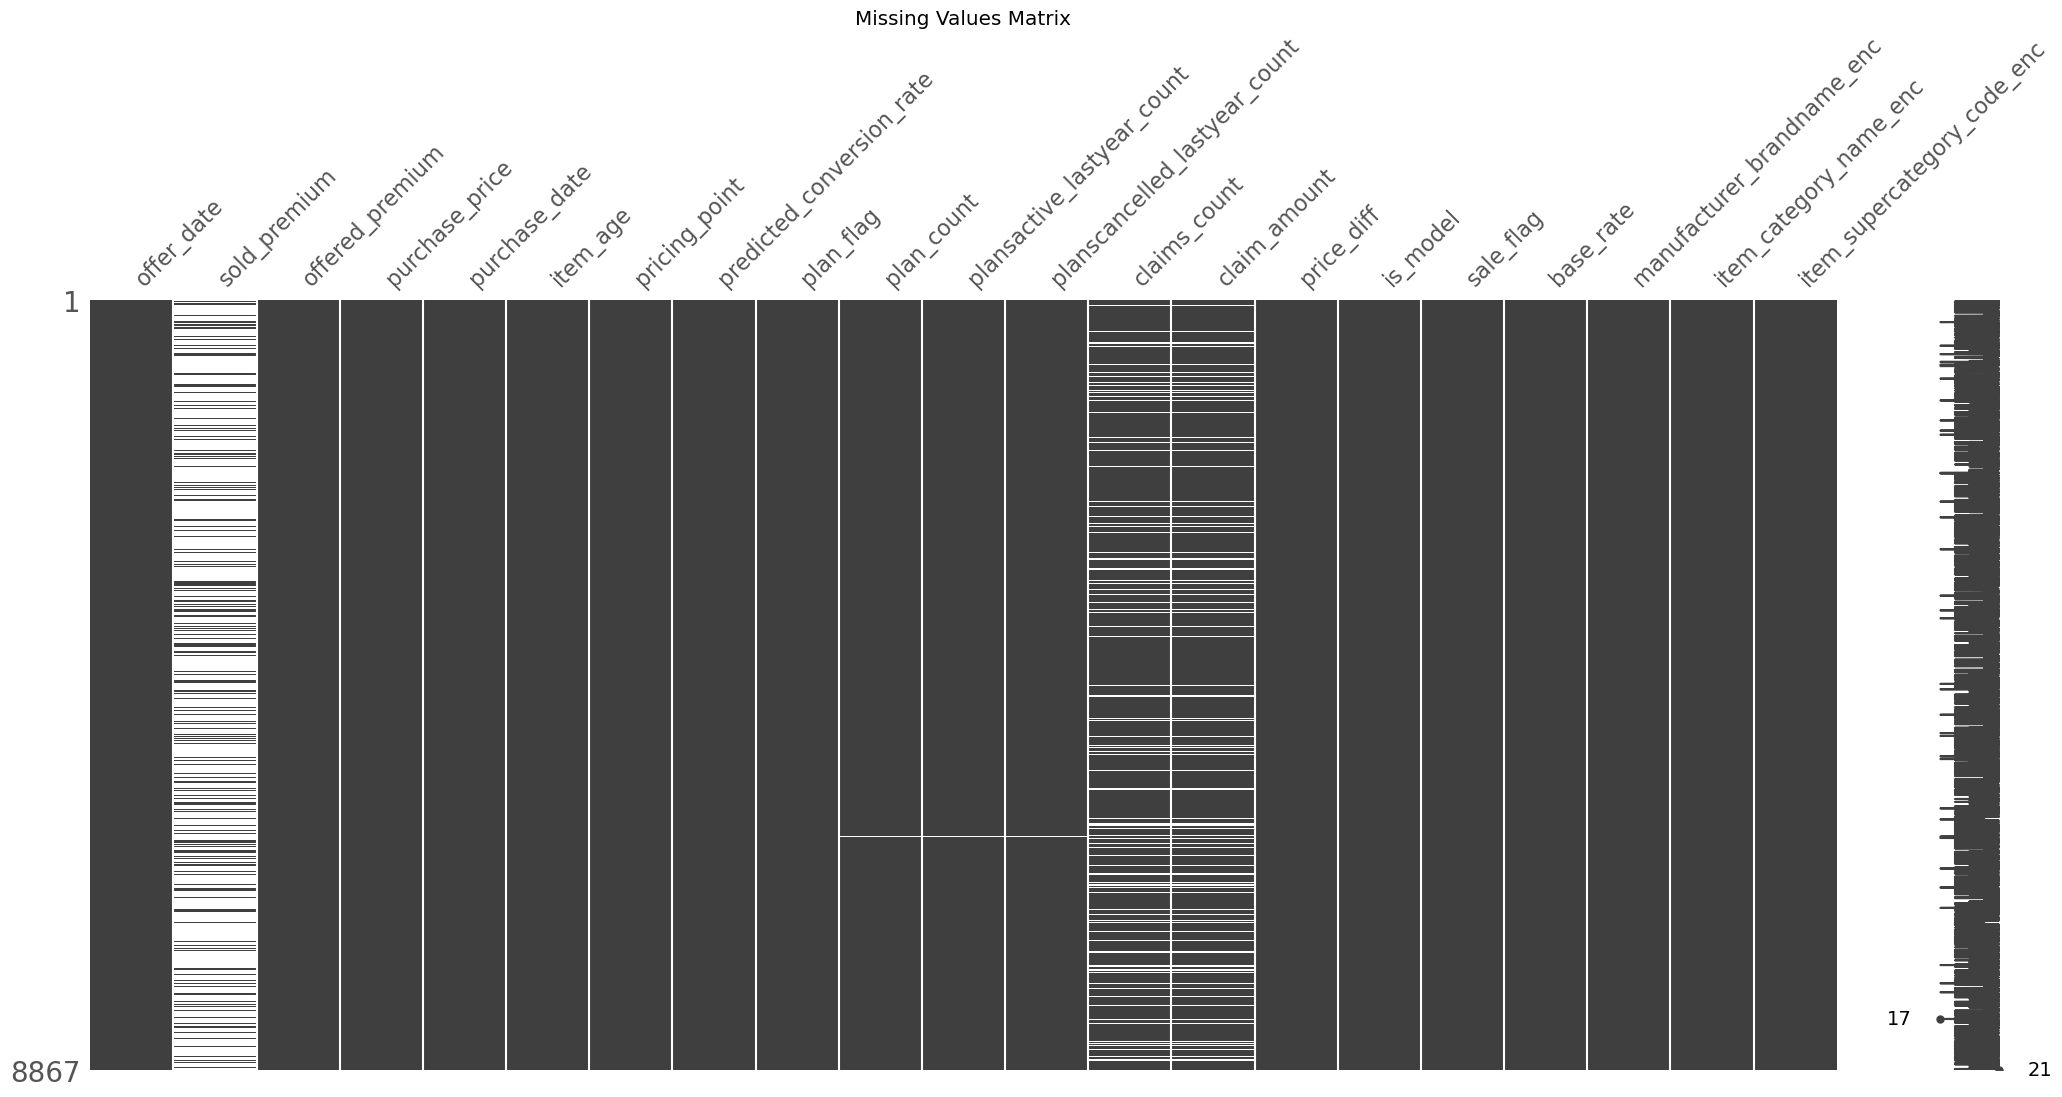

In [18]:
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

<Axes: >

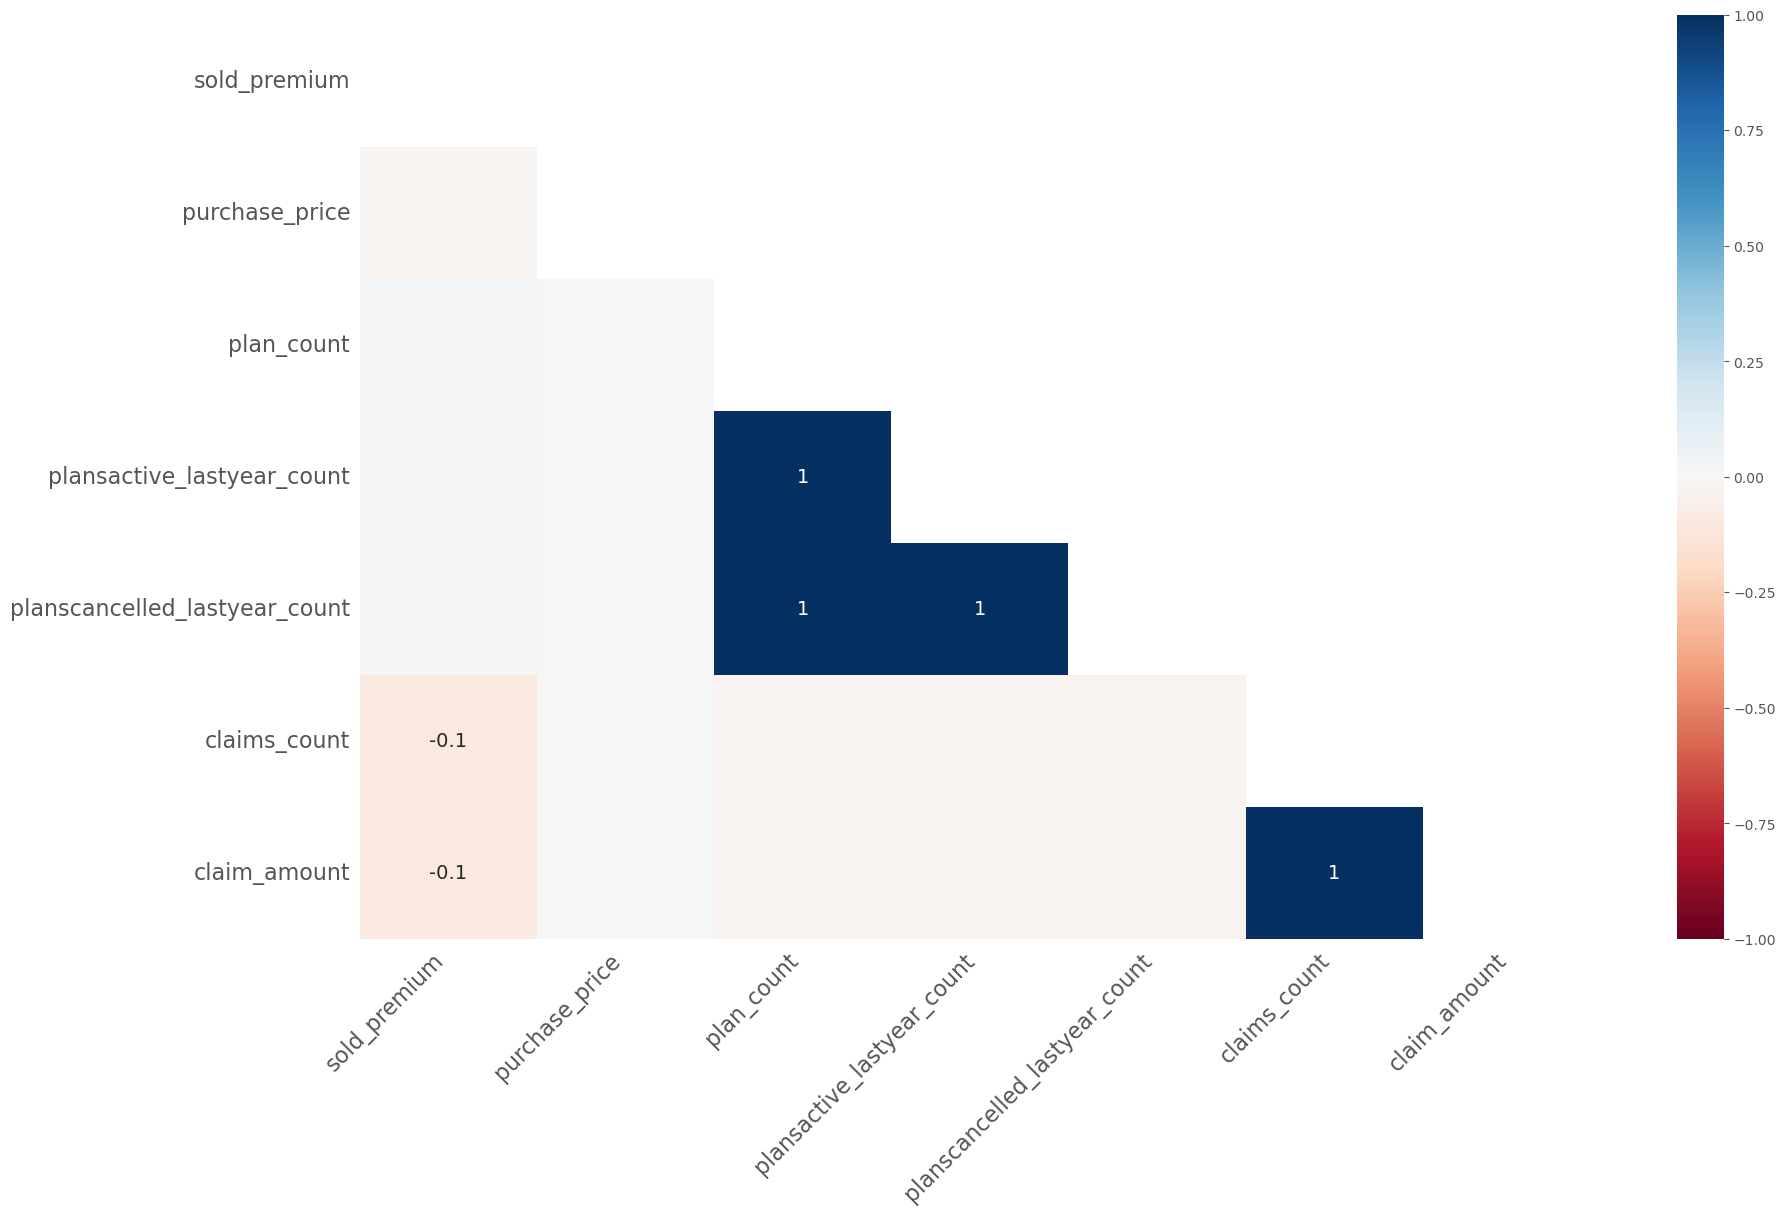

In [19]:
msno.heatmap(df)

Check for missing values in 'purchase_price'

In [20]:
df[df['purchase_price'].isnull()]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
2706,2023-04-20,40.2,40.2,NaN,2023-04-04,16,@22%,0.58,True,4,4,0,2,795.0,0.073718,True,True,37.44,123,24,2


In [21]:
df[(df['manufacturer_brandname_enc'] == 123) & (df['item_category_name_enc'] == 24) & (df['item_supercategory_code_enc'] == 2)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
2706,2023-04-20,40.2,40.2,NaN,2023-04-04,16,@22%,0.58,True,4,4,0,2,795.0,0.073718,True,True,37.44,123,24,2


In [22]:
df = df.dropna(subset=['purchase_price'])

Check for missing values in 'sold_premium'

In [23]:
df['sold_premium'].isnull().value_counts()

sold_premium
True     6876
False    1990
Name: count, dtype: int64

In [24]:
df[df['sold_premium'].notnull() & (df['sale_flag'] != True)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc


In [25]:

df[(df['sold_premium'].isnull()) & (df['sale_flag'] == True)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc


Check for missing values in plan_count &  plansactive_lastyear_count & planscancelled_lastyear_count

In [26]:
df[df['plan_count'].isnull()].index

Index([ 254,  526,  623,  712,  745,  760,  905, 1156, 1386, 1503, 1551, 1990,
       1996, 2321, 2502, 2870, 3404, 3573, 3664, 3868, 4420, 4482, 4775, 4986,
       5019, 5254, 5285, 5853, 5980, 6027, 6178, 6194, 6545, 6764, 6999, 7564,
       7657, 7867, 7874, 7970, 8278],
      dtype='int64')

In [27]:
df['plan_count'].value_counts(normalize=True)
#df['plansactive_lastyear_count'].value_counts(normalize=True)
# df['planscancelled_lastyear_count'].value_counts(normalize=True)

plan_count
0     0.80204
1    0.104249
2    0.037167
5    0.024136
3    0.020057
4    0.012351
Name: proportion, dtype: Float64

In [28]:
Na_plan_columns = ['planscancelled_lastyear_count', 'plansactive_lastyear_count', 'plan_count']
df[Na_plan_columns] = df[Na_plan_columns].fillna(0)

Check for missing values in 'claims_count' and 'amount_count'

In [29]:
df['claims_count'].isnull().value_counts(normalize=True)

claims_count
False    0.870404
True     0.129596
Name: proportion, dtype: float64

In [30]:
df['claims_count'].dropna().value_counts(normalize=True)


claims_count
0     0.898017
1     0.052482
2     0.024103
3     0.012181
4     0.006609
5     0.002851
6     0.001814
7     0.000907
8     0.000389
21     0.00013
11     0.00013
30     0.00013
10     0.00013
24     0.00013
Name: proportion, dtype: Float64

In [31]:
df[df['claims_count'].isnull()]['sale_flag'].value_counts()

sale_flag
False    765
True     384
Name: count, dtype: int64

In [32]:
# Create a missing flag to track missing claims during analysis
df['missing_claims_flag'] = df['claims_count'].isnull().astype(int)

In [33]:
# Grouping potentially relevant columns to be used in the imputation
impute_cols = [
    'claims_count', 
    'claim_amount',
    'plan_count',
    'plansactive_lastyear_count',
    'planscancelled_lastyear_count',
    'purchase_price',
    'item_age',
    'sale_flag'
]
impute_df = df[impute_cols]

In [34]:
# Perform MICE imputation
imputer = IterativeImputer(random_state=0, max_iter=10)

imputed_array = imputer.fit_transform(impute_df)

df[impute_cols] = imputed_array

In [35]:
# Round to nearest integer
df['claims_count'] = df['claims_count'].round().astype('Int64')

In [36]:
df.loc[df['claims_count'] == 0, 'claim_amount'] = 0.0

In [37]:
df.loc[df['missing_claims_flag'] == 1, 'claims_count'].value_counts()

claims_count
0    872
1    233
2     38
3      6
Name: count, dtype: Int64

In [49]:
df[(df['missing_claims_flag'] == 1) & (df['claims_count'] == 3)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc,missing_claims_flag
1733,2023-03-25,69.36,69.36,311.00,2023-03-03,22.0,@23%,0.51,True,2.0,9.0,7.0,3,431.699301,0.090566,True,1.0,63.60,57,37,4,1
2485,2023-03-01,NaN,48.12,329.98,2021-12-06,450.0,@22%,0.58,True,4.0,9.0,5.0,3,425.898539,0.297735,True,0.0,37.08,129,25,2,1
3335,2023-03-25,40.68,40.68,250.00,2023-03-25,0.0,@23%,0.52,True,3.0,8.0,5.0,3,361.924159,-0.011662,True,1.0,41.16,7,12,4,1
4498,2023-03-16,69.72,69.72,419.00,2023-03-09,7.0,@22%,0.61,True,5.0,8.0,3.0,3,339.258607,0.030142,True,1.0,67.68,57,37,4,1
4647,2023-04-13,NaN,48.24,279.00,2023-04-08,5.0,@23%,0.32,False,0.0,9.0,9.0,3,464.363902,0.049608,True,0.0,45.96,62,11,1,1
4944,2023-03-07,NaN,82.08,400.00,2021-03-07,730.0,@23%,0.56,True,5.0,11.0,2.0,3,331.727005,0.297913,True,0.0,63.24,107,37,4,1


In [51]:
df.loc[df['plansactive_lastyear_count'] >7,'claims_count'].value_counts()

claims_count
3     34
2     33
1     23
0     22
4     13
5     12
6      7
7      6
8      3
21     1
11     1
30     1
10     1
24     1
Name: count, dtype: Int64

In [53]:
df.loc[df['planscancelled_lastyear_count'] >4,'claims_count'].value_counts()

claims_count
2     29
3     17
1     14
0     10
4      8
7      5
5      4
8      2
21     1
6      1
11     1
30     1
10     1
24     1
Name: count, dtype: Int64

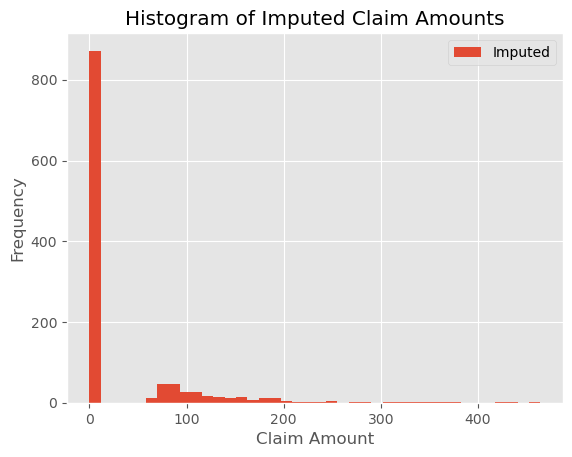

In [38]:
df[df['missing_claims_flag'] == 1]['claim_amount'].hist(bins=40, label='Imputed')

plt.legend()
plt.title('Histogram of Imputed Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()


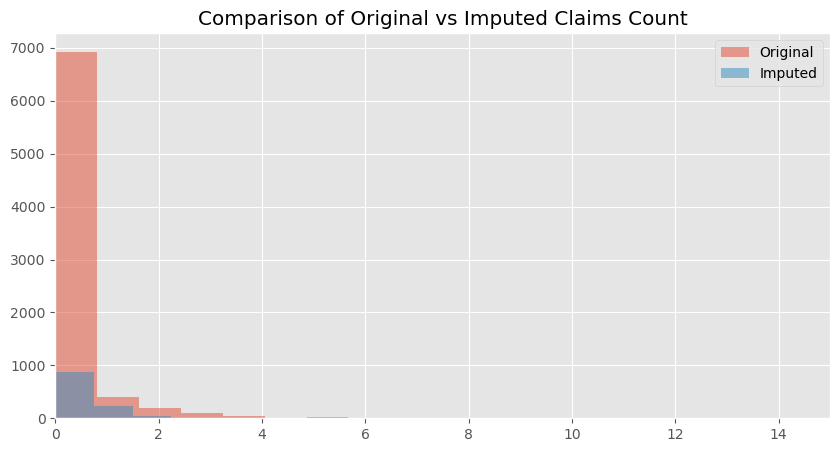

In [43]:
plt.figure(figsize=(10,5))
df[df['missing_claims_flag'] == 0]['claims_count'].hist(bins=37, alpha=0.5, label='Original')
df[df['missing_claims_flag'] == 1]['claims_count'].hist(bins=4, alpha=0.5, label='Imputed')

plt.xlim(0, 15)
plt.legend()
plt.title('Comparison of Original vs Imputed Claims Count')
plt.show()

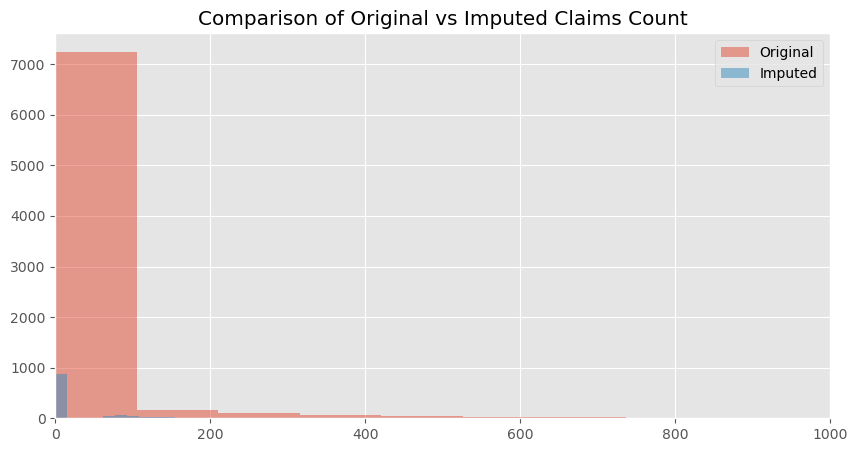

In [42]:
plt.figure(figsize=(10,5))
df[df['missing_claims_flag'] == 0]['claim_amount'].hist(bins=100, alpha=0.5, label='Original')
df[df['missing_claims_flag'] == 1]['claim_amount'].hist(bins=30, alpha=0.5, label='Imputed')
plt.legend()
plt.xlim(0, 1000)
plt.title('Comparison of Original vs Imputed Claims Count')
plt.show()

### Exploratory data analysis